In [1]:
# Import necessary libraries for data manipulation, visualization, and imputation methods
import pandas as pd  # For data manipulation using DataFrames
import numpy as np  # For numerical operations on arrays
import seaborn as sns  # For visualizing data
import matplotlib.pyplot as plt  # For creating plots
from sklearn.impute import KNNImputer, SimpleImputer  # For imputation techniques
from sklearn.experimental import enable_iterative_imputer  # Enables IterativeImputer in sklearn
from sklearn.impute import IterativeImputer  # For advanced imputation using multiple imputations
import missingno as msno  # For visualizing missing values



In [2]:
# Load a sample dataset with missing values from Seaborn's dataset library
df = sns.load_dataset('titanic')  # Load Titanic dataset which contains missing values
df.head()  # Display the first few rows of the dataset



survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [3]:
# --- Checking for Missing Values ---
# Print information about the dataset, including columns with missing values
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


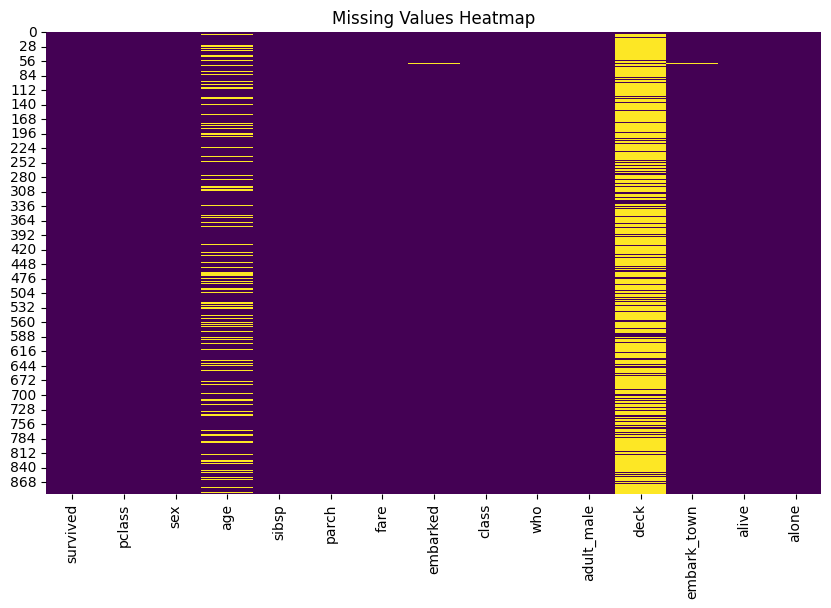

In [4]:
# Visualize missing values in the dataset using a heatmap for a quick overview
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')  # Create a heatmap showing missing values
plt.title('Missing Values Heatmap')  # Add a title to the plot
plt.show()  # Display the plot




<Axes: >

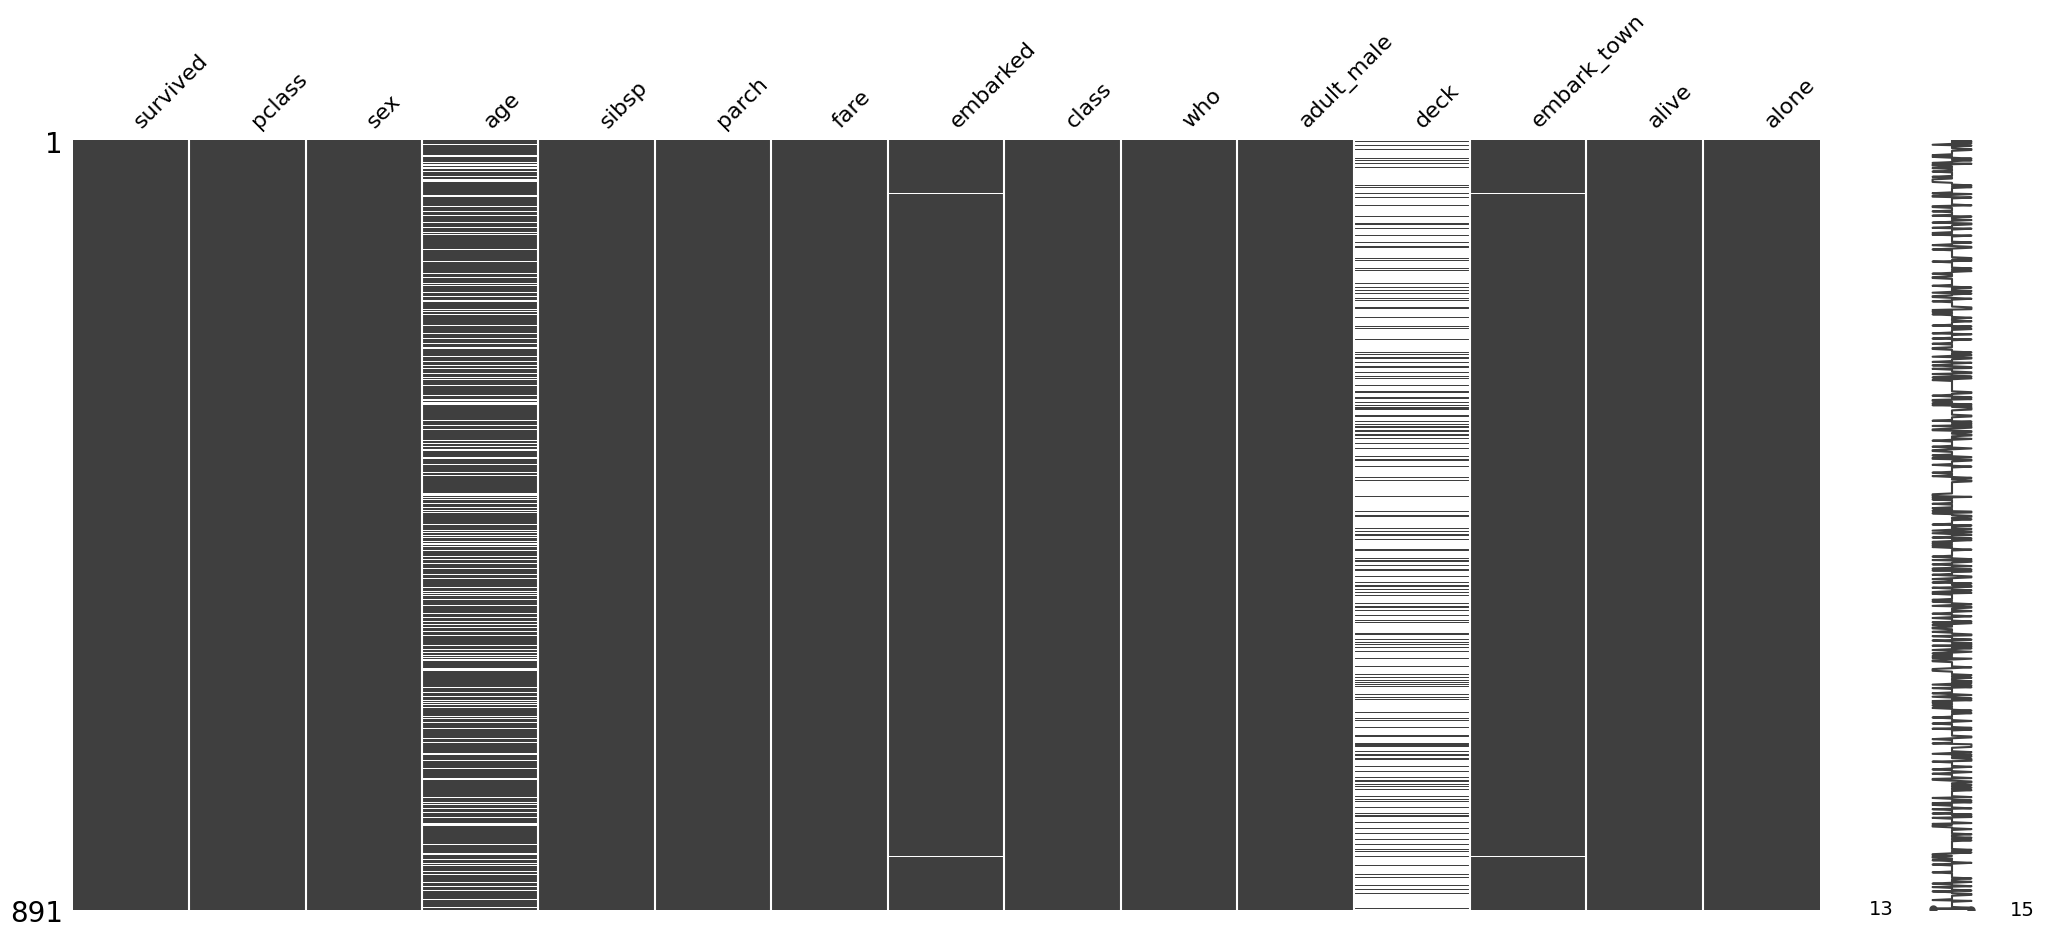

In [5]:
# Visualize missing values using the missingno library's matrix visualization
msno.matrix(df)  # Plot a matrix that shows the distribution of missing values



In [6]:
# --- Dropping Missing Values ---
# Original DataFrame shape
print("Original Dataset Shape:", df.shape)

# Drop rows with any missing values in the dataset
df_dropped_rows = df.dropna()  # Create a new DataFrame with rows with missing values removed
print(f'After Dropping Rows with Missing Values: {df_dropped_rows.shape}')  # Display the new shape

# Drop columns with any missing values in the dataset
df_dropped_columns = df.dropna(axis=1)  # Create a new DataFrame with columns with missing values removed
print(f'After Dropping Columns with Missing Values: {df_dropped_columns.shape}')  # Display the new shape



Original Dataset Shape: (891, 15)
After Dropping Rows with Missing Values: (182, 15)
After Dropping Columns with Missing Values: (891, 11)


In [7]:
# --- Imputation Techniques ---
# Initialize imputers for different statistical measures: mean, median, and mode
mean_imputer = SimpleImputer(strategy='mean')  # Imputer to fill missing values with the mean
median_imputer = SimpleImputer(strategy='median')  # Imputer to fill missing values with the median
mode_imputer = SimpleImputer(strategy='most_frequent')  # Imputer to fill missing values with the mode

# Display original 'age' column with missing values
print("Original 'age' column with missing values:")
print(df['age'].head(10))




Original 'age' column with missing values:
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64


In [8]:
# Apply mean imputation specifically on the 'age' column (numerical column)
df_mean_imputed = df.copy()  # Create a copy of the original DataFrame for mean imputation
df_mean_imputed['age'] = mean_imputer.fit_transform(df[['age']])  # Fill missing 'age' values with the column's mean
print("After Mean Imputation on 'age' column:")
print(df_mean_imputed['age'].head(10))  # Display the modified 'age' column




After Mean Imputation on 'age' column:
0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64


In [9]:
# --- Forward and Backward Filling ---
# Fill missing values using forward fill (fills using the previous value)
df_ffill = df.copy()
df_ffill = df_ffill.fillna(method='ffill')  # Forward-fill missing values in the DataFrame
print("After Forward Fill on dataset:")
print(df_ffill.head(10))  # Display first few rows to observe forward-filled values


After Forward Fill on dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male  35.0      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman     

<ipython-input-9-2e1f53562144>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df_ffill.fillna(method='ffill')  # Forward-fill missing values in the DataFrame


In [10]:
# Fill missing values using backward fill (fills using the next value)
df_bfill = df.copy()
df_bfill = df_bfill.fillna(method='bfill')  # Backward-fill missing values in the DataFrame
print("After Backward Fill on dataset:")
print(df_bfill.head(10))  # Display first few rows to observe backward-filled values




After Backward Fill on dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male  54.0      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True    C  Southampton    no  False  
1  woman    

<ipython-input-10-d46e5b4c8746>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df_bfill.fillna(method='bfill')  # Backward-fill missing values in the DataFrame


In [11]:
# --- Interpolation ---
# Use interpolation to estimate missing values in the 'age' column
df_interpolated = df.copy()  # Create a copy of the original DataFrame for interpolation
df_interpolated['age'] = df_interpolated['age'].interpolate()  # Interpolate missing 'age' values
print("After Interpolation on 'age' column:")
print(df_interpolated['age'].head(10))  # Display the modified 'age' column

After Interpolation on 'age' column:
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    44.5
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64


In [12]:
# --- K-Nearest Neighbors (KNN) Imputation ---
# Initialize KNN imputer with a specific number of neighbors
knn_imputer = KNNImputer(n_neighbors=5)  # Imputer to fill missing values based on similar rows

# Apply KNN imputation on numerical columns only (ignoring non-numeric data)
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df.select_dtypes(include=[np.number])),
                              columns=df.select_dtypes(include=[np.number]).columns)  # Create DataFrame with KNN-imputed values
print("After KNN Imputation on numerical columns:")
print(df_knn_imputed.head(10))  # Display first few rows to observe KNN-imputed values

After KNN Imputation on numerical columns:
   survived  pclass   age  sibsp  parch     fare
0       0.0     3.0  22.0    1.0    0.0   7.2500
1       1.0     1.0  38.0    1.0    0.0  71.2833
2       1.0     3.0  26.0    0.0    0.0   7.9250
3       1.0     1.0  35.0    1.0    0.0  53.1000
4       0.0     3.0  35.0    0.0    0.0   8.0500
5       0.0     3.0  24.2    0.0    0.0   8.4583
6       0.0     1.0  54.0    0.0    0.0  51.8625
7       0.0     3.0   2.0    3.0    1.0  21.0750
8       1.0     3.0  27.0    0.0    2.0  11.1333
9       1.0     2.0  14.0    1.0    0.0  30.0708


In [13]:

# --- Iterative Imputer (MICE) ---
# Initialize the iterative imputer (MICE) for multivariate imputation
iterative_imputer = IterativeImputer()  # Imputer to iteratively predict missing values

# Apply MICE imputation on numerical columns
df_mice_imputed = pd.DataFrame(iterative_imputer.fit_transform(df.select_dtypes(include=[np.number])),
                               columns=df.select_dtypes(include=[np.number]).columns)  # Create DataFrame with MICE-imputed values
print("After MICE (Iterative) Imputation on numerical columns:")
print(df_mice_imputed.head(10))  # Display first few rows to observe MICE-imputed values


After MICE (Iterative) Imputation on numerical columns:
   survived  pclass        age  sibsp  parch     fare
0       0.0     3.0  22.000000    1.0    0.0   7.2500
1       1.0     1.0  38.000000    1.0    0.0  71.2833
2       1.0     3.0  26.000000    0.0    0.0   7.9250
3       1.0     1.0  35.000000    1.0    0.0  53.1000
4       0.0     3.0  35.000000    0.0    0.0   8.0500
5       0.0     3.0  29.092853    0.0    0.0   8.4583
6       0.0     1.0  54.000000    0.0    0.0  51.8625
7       0.0     3.0   2.000000    3.0    1.0  21.0750
8       1.0     3.0  27.000000    0.0    2.0  11.1333
9       1.0     2.0  14.000000    1.0    0.0  30.0708


In [14]:

# --- Handling Categorical Variables ---
# Display original 'embarked' column with missing values
print("Original 'embarked' column with missing values:")
print(df['embarked'].head(10))


Original 'embarked' column with missing values:
0    S
1    C
2    S
3    S
4    S
5    Q
6    S
7    S
8    S
9    C
Name: embarked, dtype: object


In [15]:

# Fill missing values in the 'embarked' column (categorical) with a placeholder 'Unknown'
df_filled_categorical = df.copy()  # Create a copy of the original DataFrame for categorical handling
df_filled_categorical['embarked'] = df_filled_categorical['embarked'].fillna('Unknown')  # Fill missing 'embarked' values with 'Unknown'
print("After Filling Missing Categorical 'embarked' with 'Unknown':")
print(df_filled_categorical['embarked'].head(10))  # Display modified 'embarked' column

# --- Conclusion ---
# This notebook provided a comprehensive overview of handling missing values, including
# techniques like dropping, imputation (statistical and predictive), and categorical handling.


After Filling Missing Categorical 'embarked' with 'Unknown':
0    S
1    C
2    S
3    S
4    S
5    Q
6    S
7    S
8    S
9    C
Name: embarked, dtype: object
